## 의사결정나무

__의사결정나무(decision tree)__ 는 여러가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 __CART(Classification And Regression Tree)__ 라고도 한다.

의사결정나무를 이용한 분류법은 다음과 같다.

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.

2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹 (자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눈다.

3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

### 의사결정나무를 사용한 분류예측

의사결정나무에 전체 트레이닝 데이터를 모두 적용해 보면 각 데이터는 특정한 노드를 타고 내려가게 된다. 각 노드는 그 노드를 선택한 데이터 집합을 가진다. 이 때 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포 $P(Y=k|X)_{\text{node}}$ 라고 정의한다.

$P(Y=k|X)_{\text{node}} \approx \dfrac{N_{\text{node},k}}{N_{\text{node}}}$

테스트 데이터 X_test의 클래스를 예측할 때는 가장 상위의 노드부터 분류 규칙을 차례대로 적용하여 마지막에 도달하는 노드의 조건부 확률 분포를 이용하여 클래스를 예측한다.

$\hat{Y} = \text{arg}\max_k P(Y=k|X_{\text{test}})_{\text{last node}}$

#### 분류 규칙을 정하는 방법

분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 ( 값이 균등하면 엔트로피가 높다) 최상의 독립 변수와 기준값을 찾는 것이다. 이러한 기준을 정량화 한것이 정보획득량(information gain)이다.
기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보획득량을 구하여 가장 정보획득량이 큰 독립 변수와 기준값을 선택한다.

#### 정보획득량

정보획득량(information gain)는 X라는 조건에 의해 확률 변수 Y의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 다음처럼 Y의 엔트로피에서 X에 대한 Y의 조건부 엔트로피를 뺀 값으로 정의 된다.

$IG[Y,X] = H[Y] - H[Y|X]$

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X,y)

In [2]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

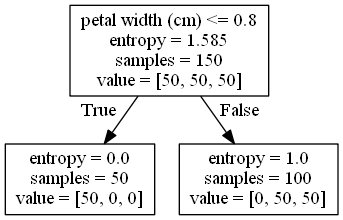

In [3]:
draw_decision_tree(tree1)

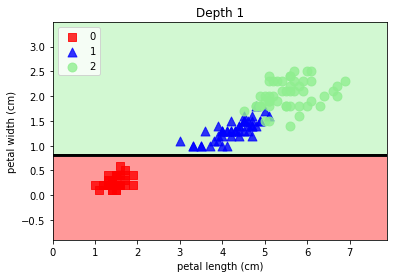

In [4]:
import warnings
 
warnings.filterwarnings("ignore")
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
plot_decision_regions(X,y,tree1,'Depth 1')
plt.show()

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [6]:
tree2 = DecisionTreeClassifier(
    criterion='entropy',max_depth=2, random_state=0).fit(X,y)

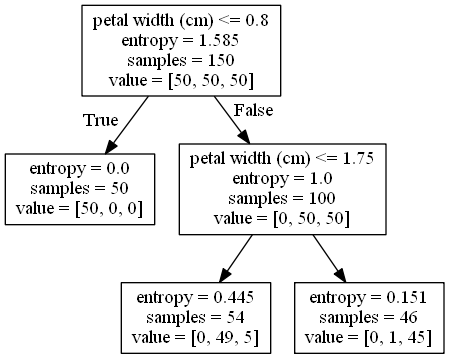

In [7]:
draw_decision_tree(tree2)

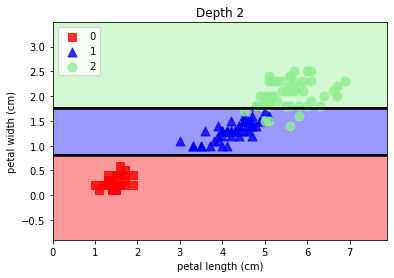

In [8]:
plot_decision_regions(X,y,tree2,'Depth 2')
plt.show()

In [9]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

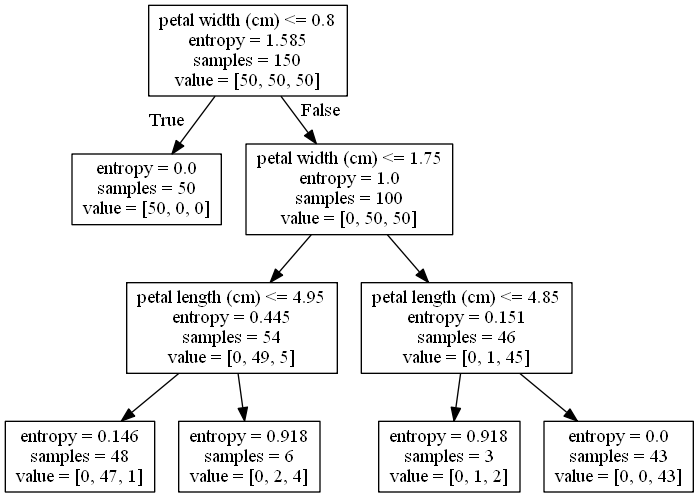

In [10]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X,y)

draw_decision_tree(tree3)

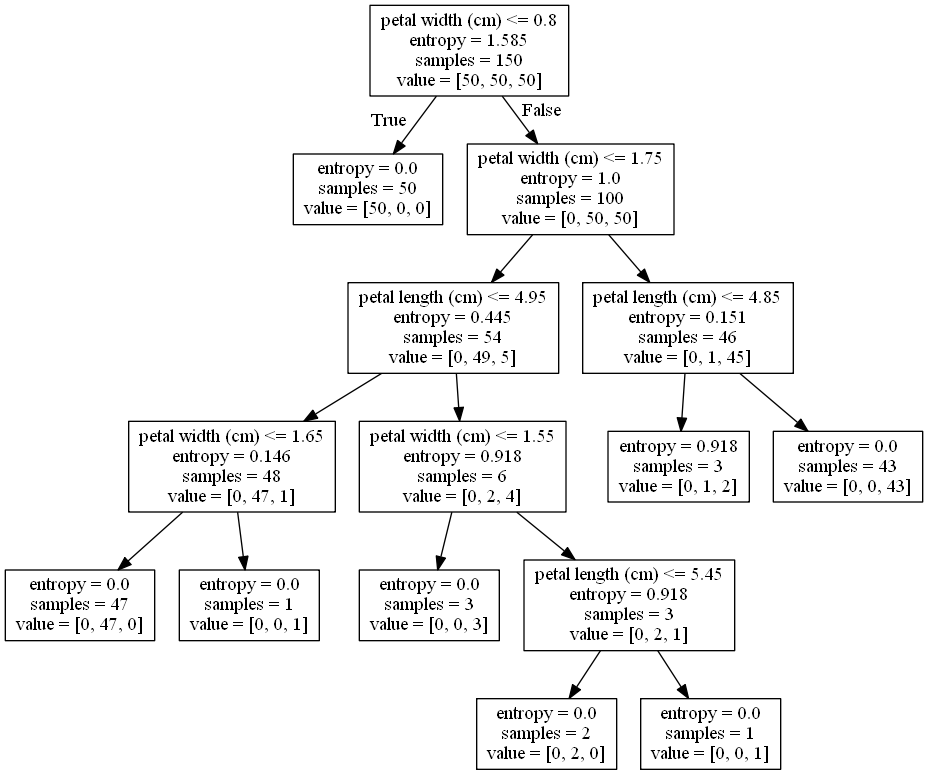

In [11]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=6, random_state=0).fit(X,y)

draw_decision_tree(tree3)

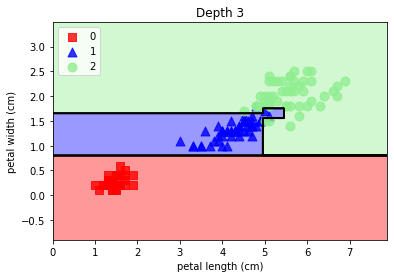

In [12]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [13]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [14]:
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

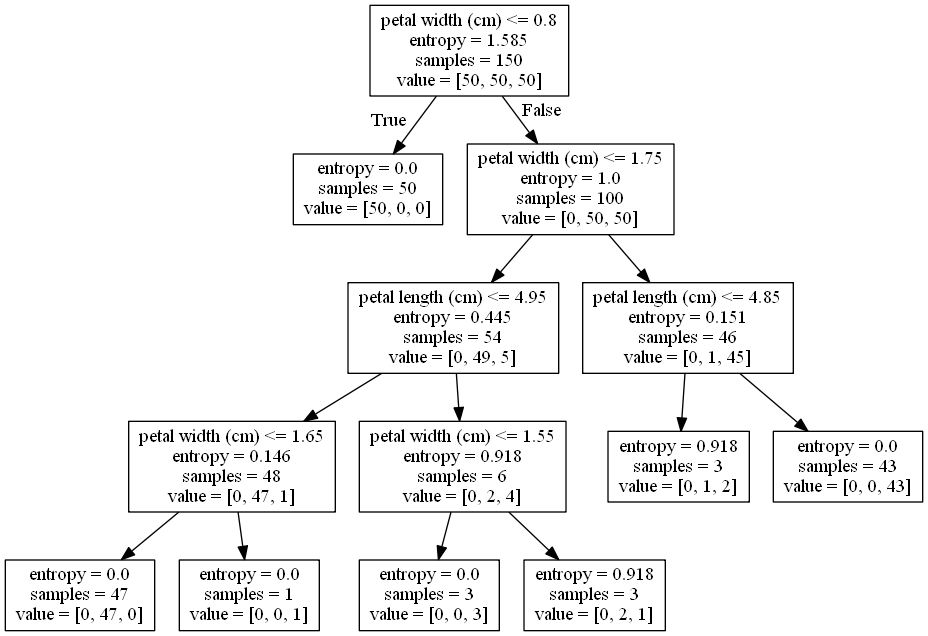

In [15]:
draw_decision_tree(tree4)


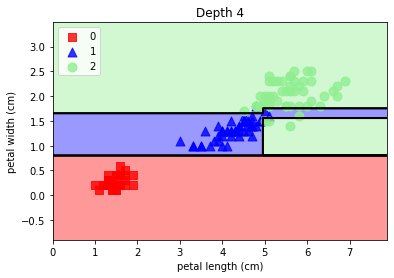

In [16]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y, tree4.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [18]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                               random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

0.9466666666666667

In [19]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
feature_names = ['pclass','age','sex']
dfX = df[feature_names].copy()
dfy = df['survived'].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [21]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male
890,3,32.000000,male


In [22]:
# import pandas as pd
# from sklearn.preprocessing import LabelBinarizer
# dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX['pclass']),
#                    columns=['c1','c2','c3'], index = dfX.index)

# dfX = pd.concat([dfX,dfX2],axis=1)
# del(dfX['pclass'])

# dfX.tail()

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,male,0,1,0
887,19.000000,female,1,0,0
888,29.699118,female,0,0,1
889,26.000000,male,1,0,0
890,32.000000,male,0,0,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

ValueError: could not convert string to float: 'male'